
@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/dkhXGTersP0

# Perceptrón
## Datos linealmente separables

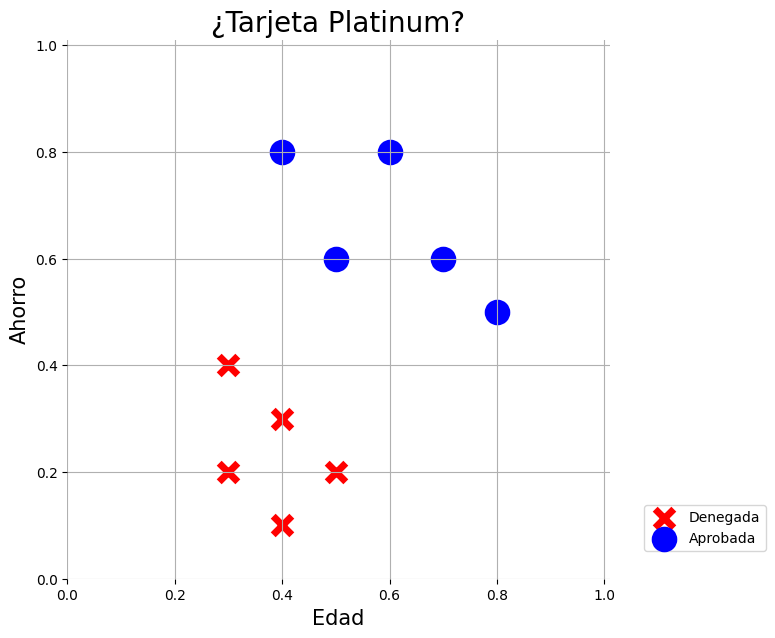

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de 10 personas -> [edad, ahorro]

personas = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1], 
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6], 
                     [0.7, 0.6], [0.8, 0.5]])

# 1 : aprobrada    0 : denegada

clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Gráfica de dispersión (edad, ahorro)
plt.figure(figsize=(7, 7))
plt.title("¿Tarjeta Platinum?", fontsize=20)
plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")
plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.grid()
plt.show()


# Función de Activación (Escalón)

In [2]:
# w1*x1 + w2*x2 + ⋯ + wn*xn

def activacion(pesos, x, b):
    z = pesos * x
    if z.sum() + b > 0:
        return 1
    else:
        return 0

pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)

pesos, b, activacion(pesos, [0.5, 0.4], b)


(array([-0.90549773,  0.48506846]), 0.04061871477177226, 0)

<h2 style="color:purple">Pseudocódigo del Perceptrón</h2>
<br>
<span style="color:red">0.</span> Inicializar los pesos y el umbral <br>
<span style="color:red">1.</span> epocas máximas = 100 <br>
<span style="color:red">2.</span> epoca = 0 <br>
<span style="color:red">3.</span> tasa de aprendizaje = 0.01 <br>
<span style="color:red">4.</span> Mientras (epoca < epocas máximas) hacer: <br>
<span style="color:red">5.</span> &nbsp;&nbsp;&nbsp;&nbsp; Para cada instancia de entrenamiento hacer: <br>
<span style="color:red">6.</span> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calcula salida del perceptrón para esa estancia <br>
<span style="color:red">7.</span> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calcula el error <br>
<span style="color:red">8.</span> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Actualiza pesos y umbral usando la tasa de aprendizaje, la instancia y el error<br>
<span style="color:red">9.</span> &nbsp;&nbsp;&nbsp;&nbsp; epoca += 1 <br>
<br><br><br>
<h2 style="color:purple">Entrenamiento del Perceptrón</h2>

In [3]:
pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)
tasa_de_aprendizaje = 0.01
epocas = 100

for epoca in range(epocas):
    error_total = 0
    for i in range(len(personas)):
        prediccion = activacion(pesos, personas[i], b)
        error = clases[i] - prediccion
        error_total += error**2
        pesos[0] += tasa_de_aprendizaje * personas[i][0] * error
        pesos[1] += tasa_de_aprendizaje * personas[i][1] * error
        b += tasa_de_aprendizaje * error 
    print(error_total, end=" ")

activacion(pesos, [0.5, 1], b)

5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

1

# Zonas de aprobación
### Gráfica de dispersión [edad, ahorro] 

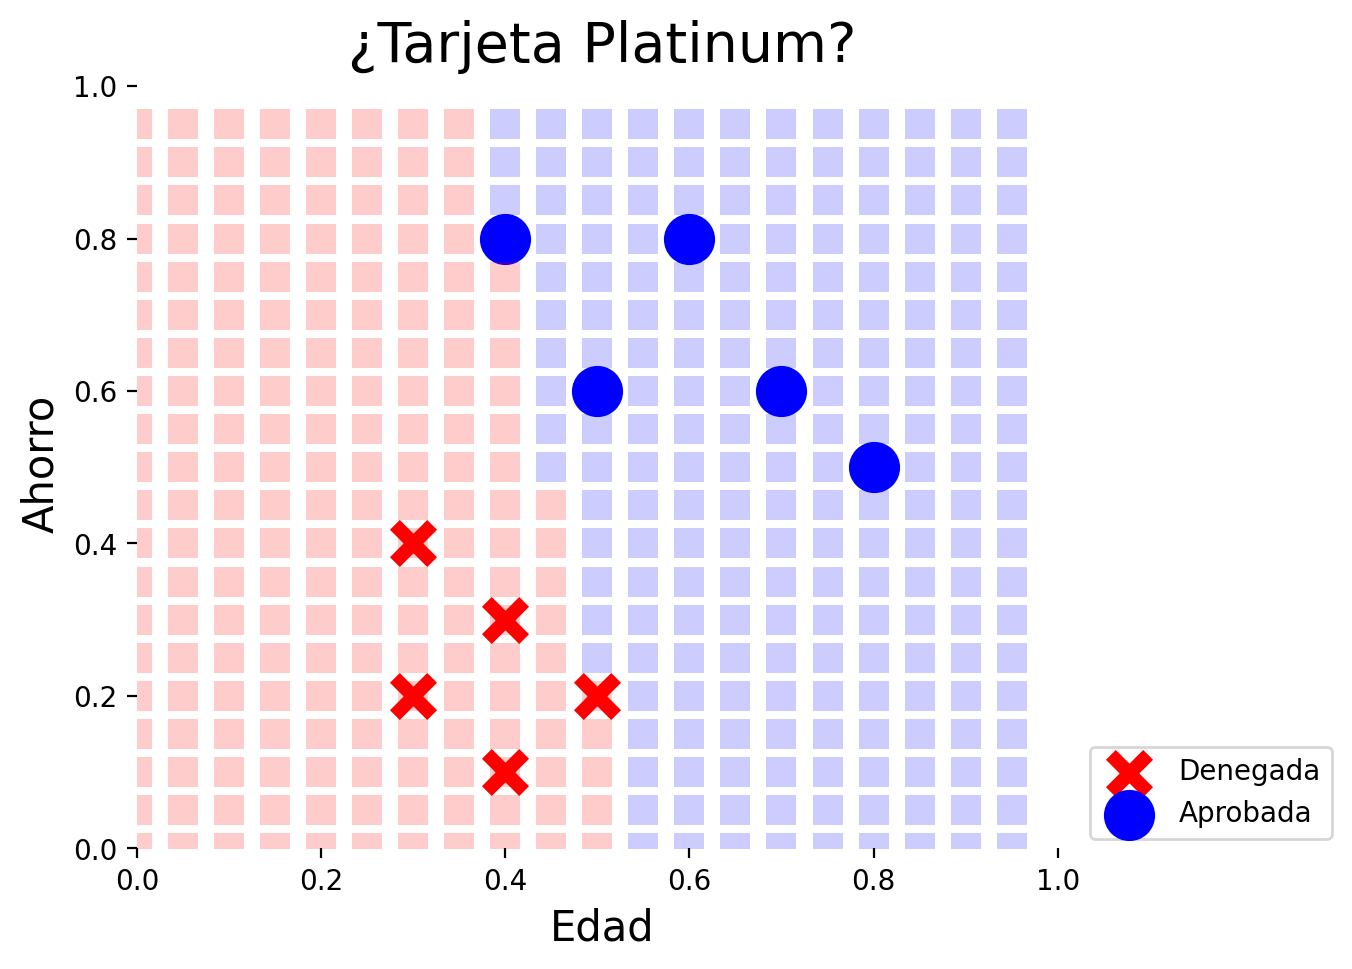

In [4]:
plt.figure(figsize=(6, 5), dpi=200)
plt.title("¿Tarjeta Platinum?", fontsize=20)

plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")

for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color = activacion(pesos, [edad, ahorro], b)
        if color == 1:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="blue", alpha=0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker="s", s=110, 
                        color="red", alpha=0.2, linewidths=0)
            
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Perceptrón con Scikit-learn

In [5]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron().fit(personas, clases)
perceptron.predict([[0.2, 0.2], [0.8, 0.8]])

array([0, 1])